In [12]:
import timeit
from pathlib import Path

import sys
sys.path.append(str(Path.cwd().parent / "classes"))
sys.path.append(str(Path.cwd().parent))

import pandas as pd
from matplotlib import pyplot as plt

from sim_config import SimConfiguration
from simulation import Simulation
from msa import Msa


TREES_PATH = Path("/home/elyawy/Data/sparta_benchmark/data")#Path.cwd() / "TRUE_TREES"


In [29]:
def refresh_sim(tree_file):
    ROOT_SEQUENCE_LENGTH = 1000

    sim_config = SimConfiguration(original_sequence_length=ROOT_SEQUENCE_LENGTH, indel_length_alpha=2.0,
                                indel_truncated_length=50,
                                rate_ins=0.03, rate_del=0.09,
                                deletion_extra_edge_length=5,
                                switch_factor=200,
                                seed=243)
    sim = Simulation(input_tree=str(tree_file), config=sim_config)
    return sim

In [30]:

time_winners = []
measured_times: list[list[float]] = []

time_labels = ["tree", "hybrid", "blocktree", "blocklist", "naive"]




for tree_path in list(TREES_PATH.iterdir())[:100]:#[0.5, 1,2,4,8,16]:

    sim = refresh_sim(tree_path / "raxml.tree")
    hybrid_time = timeit.timeit(sim.msa_from_hybrid, number=1)
    blocklist_time = timeit.timeit(sim.msa_from_blocklist, number=1)
    blocktree_time = timeit.timeit(sim.msa_from_blocktree, number=1)
    naive_time = 10000#timeit.timeit(sim.msa_from_naive, number=1)

    time_measures = [tree_path, hybrid_time, blocktree_time, blocklist_time, naive_time]
    print(time_measures)
    measured_times.append(time_measures)



[PosixPath('/home/elyawy/Data/sparta_benchmark/data/BBS50011_36'), 0.07528981000359636, 0.0722759260024759, 0.05730634000065038, 10000]
[PosixPath('/home/elyawy/Data/sparta_benchmark/data/BBS20026_32'), 0.0403173090016935, 0.045213640994916204, 0.03910667700256454, 10000]
[PosixPath('/home/elyawy/Data/sparta_benchmark/data/BBS20031_60'), 0.08086576299683657, 0.08332951399643207, 0.07753661400056444, 10000]
[PosixPath('/home/elyawy/Data/sparta_benchmark/data/BBS11007_9'), 0.010205913997197058, 0.011644947997410782, 0.010249054001178592, 10000]
[PosixPath('/home/elyawy/Data/sparta_benchmark/data/BBS30013_86'), 0.10878730600234121, 0.13044216499838512, 0.11319801199715585, 10000]
[PosixPath('/home/elyawy/Data/sparta_benchmark/data/BBS20040_87'), 0.10211066500050947, 0.11161045699554961, 0.12237100300262682, 10000]
[PosixPath('/home/elyawy/Data/sparta_benchmark/data/BBS30018_78'), 0.1013071929992293, 0.09666042900062166, 0.09065864399599377, 10000]
[PosixPath('/home/elyawy/Data/sparta_benc

In [15]:
%%timeit
for tree_path in list(TREES_PATH.iterdir()):#[0.5, 1,2,4,8,16]:
    sim = refresh_sim(tree_path / "raxml.tree")
    sim.msa_from_blocklist()


5.94 s ± 110 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
%%timeit
for tree_path in list(TREES_PATH.iterdir()):#[0.5, 1,2,4,8,16]:
    sim = refresh_sim(tree_path / "raxml.tree")
    sim.msa_from_blocktree()

6.23 s ± 67.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
%%timeit
for tree_path in list(TREES_PATH.iterdir()):#[0.5, 1,2,4,8,16]:
    sim = refresh_sim(tree_path / "raxml.tree")
    sim.msa_from_hybrid()

5.84 s ± 82.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [31]:
times_df = pd.DataFrame(measured_times, columns=time_labels).reset_index()

# times_df.idxmin(axis=1).value_counts()
times_df.loc[(times_df.blocklist - times_df.hybrid).abs().idxmax()].to_list()

[np.int64(80),
 PosixPath('/home/elyawy/Data/sparta_benchmark/data/BBS20039_91'),
 np.float64(0.12228027899982408),
 np.float64(0.1304656740030623),
 np.float64(0.16665283399925102),
 np.int64(10000)]

In [32]:
times_df.iloc[:,2:].idxmin(axis=1).value_counts()


blocklist    53
hybrid       47
Name: count, dtype: int64

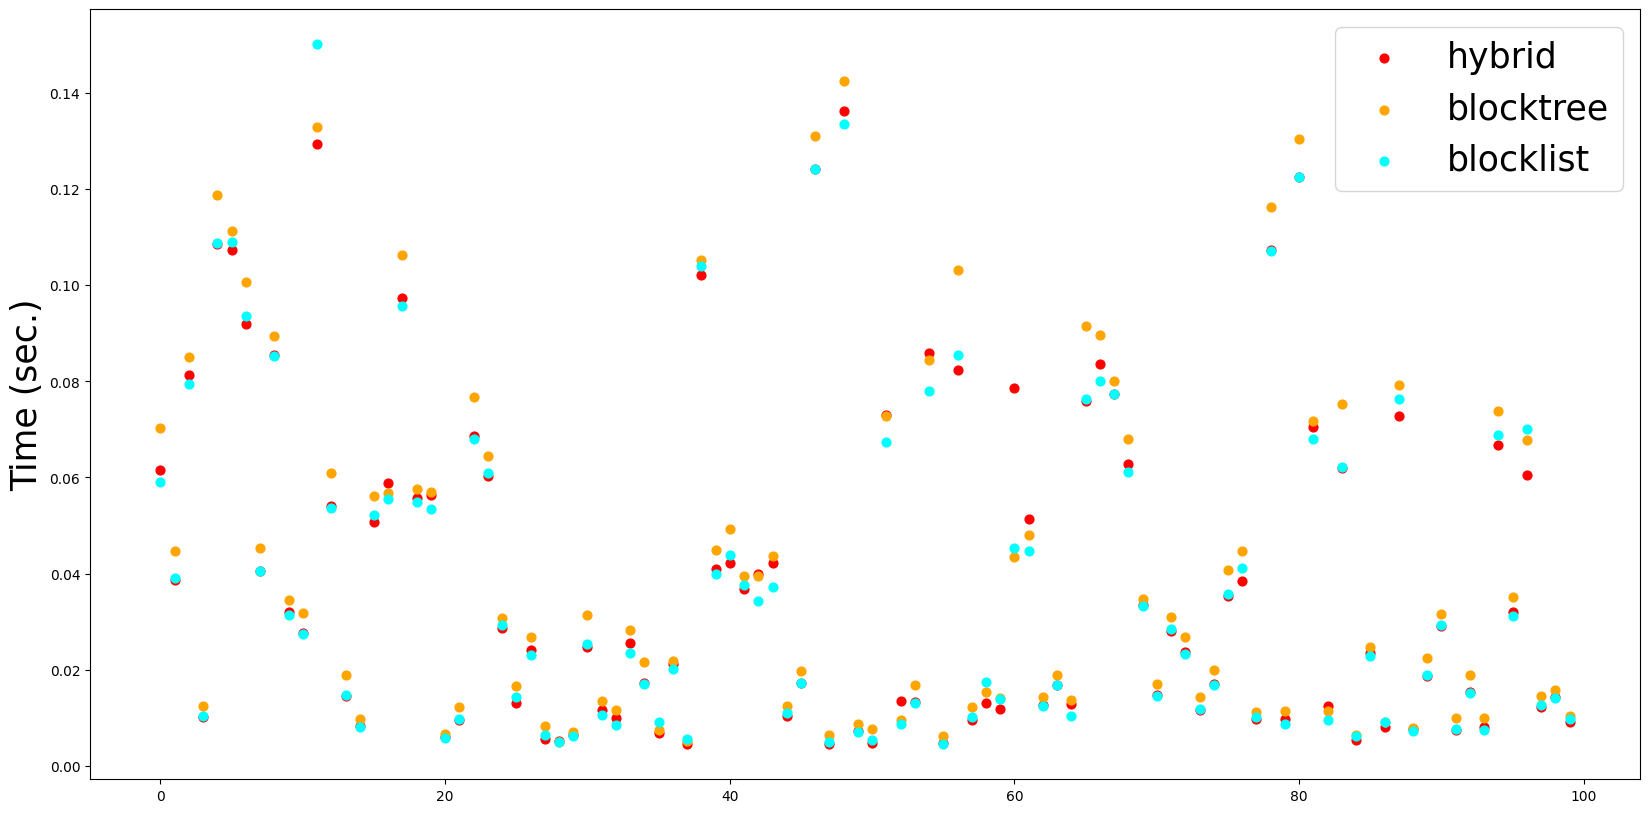

In [26]:

ax = times_df.plot.scatter(x="index", y=time_labels[1], c="red", label=time_labels[1], figsize=(20, 10), s=40)

times_df.plot.scatter(x="index", y=time_labels[2], ax=ax, c="orange", label=time_labels[2], s=40)
times_df.plot.scatter(x="index", y=time_labels[3], ax=ax, c="cyan", label=time_labels[3], s=40)
ax.set_ylabel("Time (sec.)", fontsize=25)
ax.set_xlabel("")

ax.legend(fontsize=25)
